# **3. Exploratory Data Analysis**

## **Imports**

In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import scale
from pandas.plotting import lag_plot
#set style for plots
sns.set_theme(style="whitegrid", palette='deep')

## **3.1 Loading Data**

In the data wrangling notebook, I merged all the features in one dataframe. Here is the all data as df.

In [28]:
# Load csv file
url='https://github.com/hangulde/Springboard/raw/main/Capstone%202/dataset_ready_for_EDA/all_features_eda.csv'
df = pd.read_csv(url, index_col='date')
df.head()

,pm25,day,month,year,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,flight_number,fuel_and_gas_total,special_fuel,gasoline,vehicle-miles,natural_gas,gasoline_sales,Population,Growth,GrowthRate
date,,,,,,,,,,,,,,,,,,,,,
2021-12-31,52.00,31,12,2021,7.20,4.40,5.90,6.60,2.90,4.90,...,27285.00,246228117.00,37352085.00,208876032.00,5260,43172,5828.20,695506,1453,0.00
2021-12-30,42.00,30,12,2021,5.70,3.30,4.60,5.70,0.80,3.20,...,27285.00,246228117.00,37352085.00,208876032.00,5260,43172,5828.20,695506,1453,0.00
2021-12-29,40.00,29,12,2021,5.70,2.80,4.40,5.70,-0.10,3.10,...,27285.00,246228117.00,37352085.00,208876032.00,5260,43172,5828.20,695506,1453,0.00
2021-12-28,27.00,28,12,2021,7.20,0.70,3.90,4.20,-1.70,1.60,...,27285.00,246228117.00,37352085.00,208876032.00,5260,43172,5828.20,695506,1453,0.00
2021-12-27,26.00,27,12,2021,1.70,-1.10,0.50,1.70,-6.70,-3.40,...,27285.00,246228117.00,37352085.00,208876032.00,5260,43172,5828.20,695506,1453,0.00


In [29]:
# Check the types of columns
print(df.shape)
df.dtypes

(2922, 33)


pm25                  float64
day                     int64
month                   int64
year                    int64
tempmax               float64
tempmin               float64
temp                  float64
feelslikemax          float64
feelslikemin          float64
feelslike             float64
dew                   float64
humidity              float64
precip                float64
precipcover           float64
snow                  float64
snowdepth             float64
windgust              float64
windspeed             float64
winddir               float64
sealevelpressure      float64
cloudcover            float64
visibility            float64
icon                   object
flight_number         float64
fuel_and_gas_total    float64
special_fuel          float64
gasoline              float64
vehicle-miles           int64
natural_gas             int64
gasoline_sales        float64
Population              int64
Growth                  int64
GrowthRate            float64
dtype: obj

In [30]:
# Descriptive Statistics
pd.options.display.float_format = '{:.2f}'.format # Change the scientific notation
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pm25,2922.00,39.93,12.96,8.00,31.00,39.00,48.00,104.00
day,2922.00,15.73,8.80,1.00,8.00,16.00,23.00,31.00
month,2922.00,6.52,3.45,1.00,4.00,7.00,10.00,12.00
year,2922.00,2017.50,2.29,2014.00,2016.00,2017.50,2019.75,2021.00
tempmax,2922.00,15.44,10.21,-12.20,6.80,15.60,23.80,36.60
tempmin,2922.00,7.75,9.47,-22.80,0.60,7.80,16.10,28.30
temp,2922.00,11.48,9.62,-17.00,3.80,11.50,19.80,32.10
feelslikemax,2922.00,14.43,11.90,-22.70,4.40,15.60,23.80,41.90
feelslikemin,2922.00,5.08,12.15,-37.90,-4.00,5.20,16.10,30.80
feelslike,2922.00,9.65,11.82,-28.30,0.20,10.70,19.80,36.70


In [31]:
# Change the type of index
df.index = pd.to_datetime(df.index) 

## **3.2 Changes in PM$_{2.5}$**

The descripte statistics, time plots and decompositions of daily, weekly, monthly, quarterly and annual data are presented in this section.

### **3.2.1 Daily Trend**

In [32]:
# Plot the daily change in PM2.5
import plotly.express as px

fig = px.line(df, x=df.index, y=['pm25'], title='Change in PM2.5 between 2014-2021',
              labels = {'value':'PM2.5', 'date':'Years', 'variable':'Air quality parameter'})
fig.update_xaxes(rangeslider_visible=True, rangeslider_thickness = 0.1)

fig.update_layout(
    title={
        'text': "Change in PM2.5 between 2014-2021",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

As seen in figure, there are changes in PM$_{2.5}$ during the year.
*   There is no apparent trend in the data over this period. As years progress, PM$_{2.5}$ neither increase or decrease overall but there are changes during the year. 
*  There is an intuition about seasonality, but examining the data monthly and quarterly is more helpful.
*   There is a tend to decrease after the beginning of years and also increase towards the end of the year. It could be examined by montly analysis.
*   There are some spikes in earlies of 2014, middle of 2015, and 2021. I checked these data from the original website again, and these points were correct.



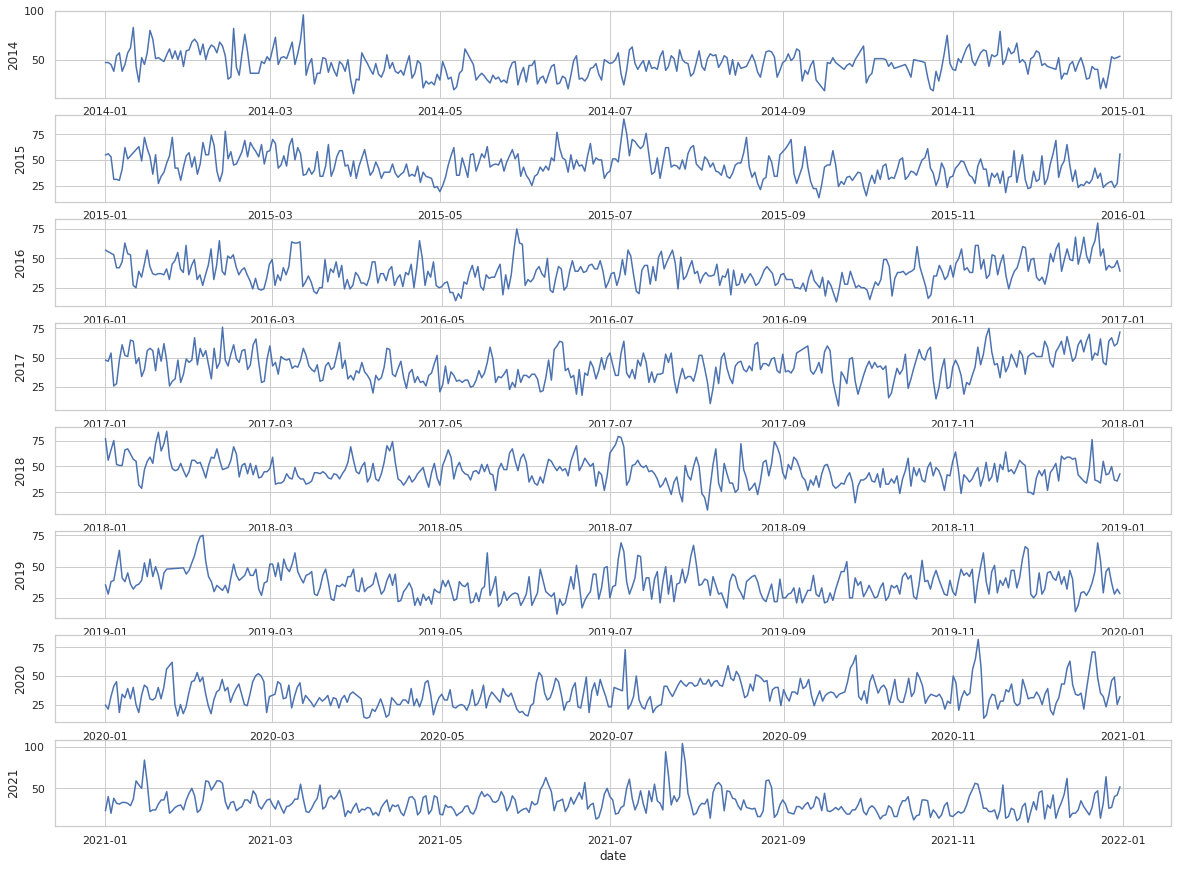

In [33]:
# Daily changes in PM2.5 according to each year.
fig, ax = plt.subplots(nrows=8, ncols=1,figsize=(20, 15))
for i in  df.year.unique():
  df_year =  df[df.year == i]
  sns.lineplot(data=df_year, x='date', y='pm25', ax=ax[i-2014])
  ax[i-2014].set_ylabel(i, fontsize = 12)

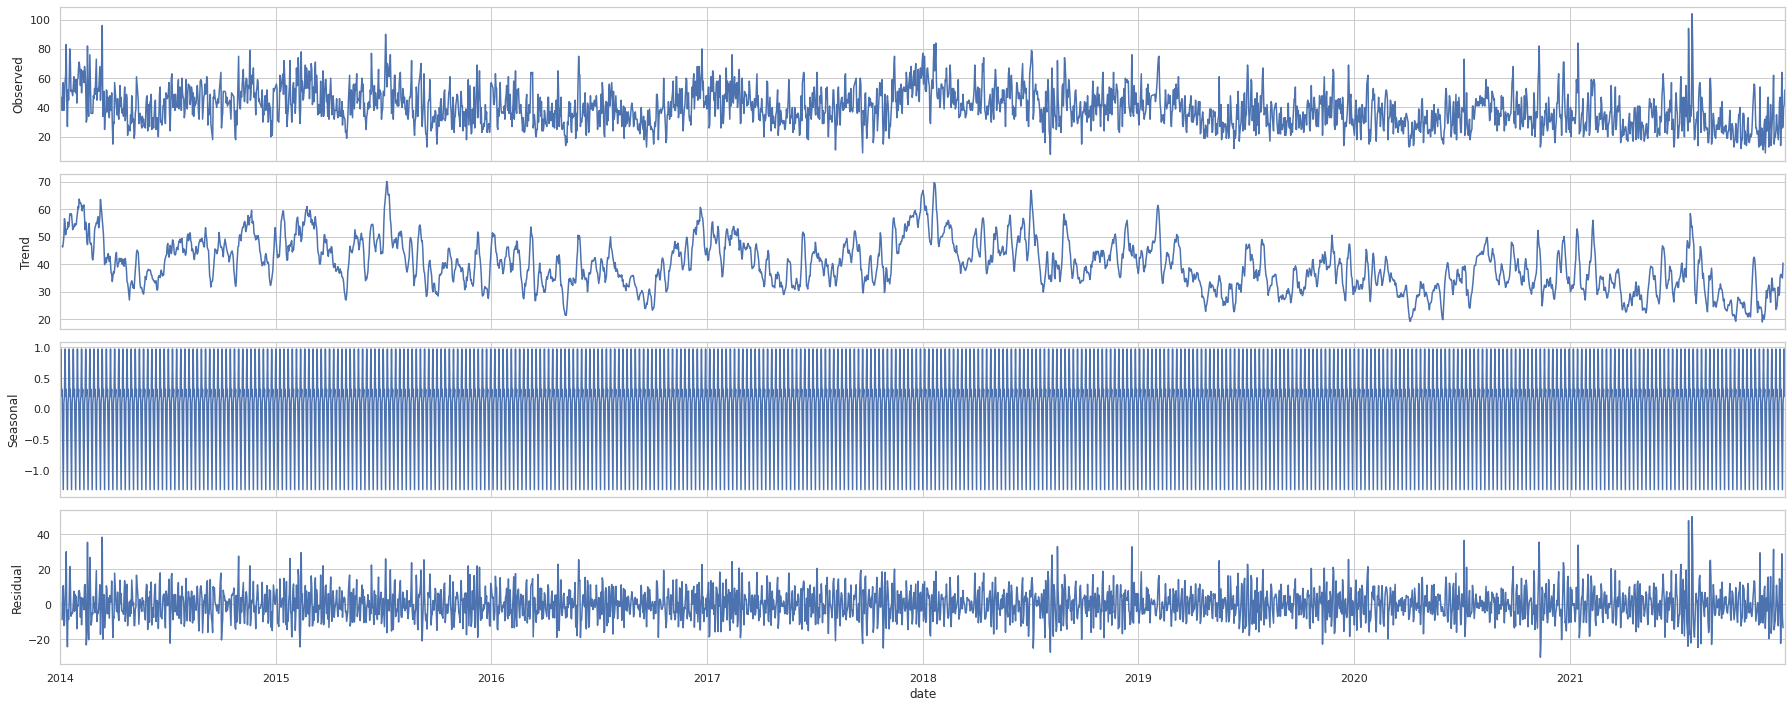

In [34]:
# Additive decomposition of daily data

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df.pm25)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual =  decomposition.resid

plt.rcParams.update({'figure.figsize': (25,10)})
decomposition.plot()
plt.show()

Decomposition of daily data doesn't really help the interpretation. This will be examined by monthly and quarterly data.

### **3.2.2 Weekly Trend**

In [35]:
# Descriptive statistics of days

# create a new column for days of week.
df['week_days'] = df.index.weekday 

# Create pivot table
table = pd.pivot_table(data=df, 
                        index=['week_days'], 
                        values='pm25',
                        aggfunc=['mean', 'max', 'min', 'std'])

# two level of columns. Drop one of them
table.columns = table.columns.droplevel(1)

#rename a new column for days
table['days'] = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

#change index
table = table.set_index('days')


table.T

days,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
mean,38.61,40.02,40.15,40.91,40.16,40.24,39.41
max,90.00,104.00,94.00,96.00,84.00,83.00,82.00
min,12.00,13.00,11.00,9.00,14.00,13.00,8.00
std,12.86,13.18,13.11,12.59,13.39,12.27,13.23


[Text(0, 0.5, 'PM 2.5'), Text(0.5, 0, 'Days of Week')]

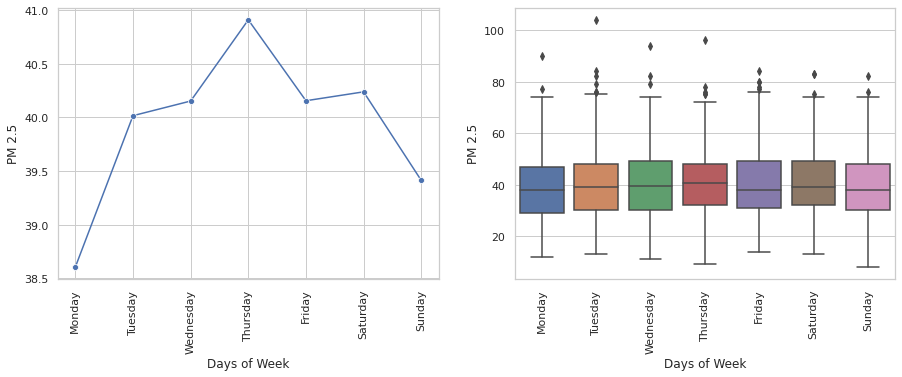

In [36]:
# line and box plot for pm2.5 according to the days of week 
f, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(x= table.index, y= 'mean' , data=table, ax=axes[0], marker='o')
sns.boxplot(x='week_days', y='pm25', data=df, ax=axes[1])

days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
axes[0].set_xticklabels(days, rotation=90) 
axes[1].set_xticklabels(days, rotation=90) 
axes[0].set(xlabel='Days of Week', ylabel='PM 2.5')
axes[1].set(xlabel='Days of Week', ylabel='PM 2.5')


* There is a trend of an increase from Monday to Thursday and a decrease there after.
*   The daily PM$_{2.5}$ averages are around 40 and so close to each other.
*   Monday has the lowest $\overline{x}=38.61$, Thursday has the highest $\overline{x}=40.91$ mean value. There is a 5.8% difference between them.
* In my opinion, neither weekdays nor weekends do affect PM$_{2.5}$ substantially.

In [37]:
# Is there a statistically difference between days?

# check normality

from scipy.stats import normaltest

# normality test
stat, p = normaltest(df.pm25)

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=111.580, p=0.000
Sample does not look Gaussian (reject H0)


In [38]:
# import
import scipy.stats as ss

# Non-parametric Kruskal-Wallis H test
data = [df.loc[ids, 'pm25'].values for ids in df.groupby('week_days').groups.values()]

H, p = ss.kruskal(*data)
p

# We couldn't reject the null hypothesis that the population medians of all of the groups are equal. 

0.16247206507393264

In [39]:
pip install scikit-posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
# import
import statsmodels.api as sa
import scikit_posthocs as sp

sp.posthoc_conover(df, val_col='pm25', group_col='week_days', p_adjust = 'holm')

# There is no statisticall significant difference between days.

,0,1,2,3,4,5,6
0,1.00,1.00,1.00,0.11,1.00,0.72,1.00
1,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,1.00,1.00,1.00,1.00,1.00,1.00,1.00
3,0.11,1.00,1.00,1.00,1.00,1.00,1.00
4,1.00,1.00,1.00,1.00,1.00,1.00,1.00
5,0.72,1.00,1.00,1.00,1.00,1.00,1.00
6,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [41]:
# Resample the dataframe weekly
df_weekly = df.resample(rule='W').mean()

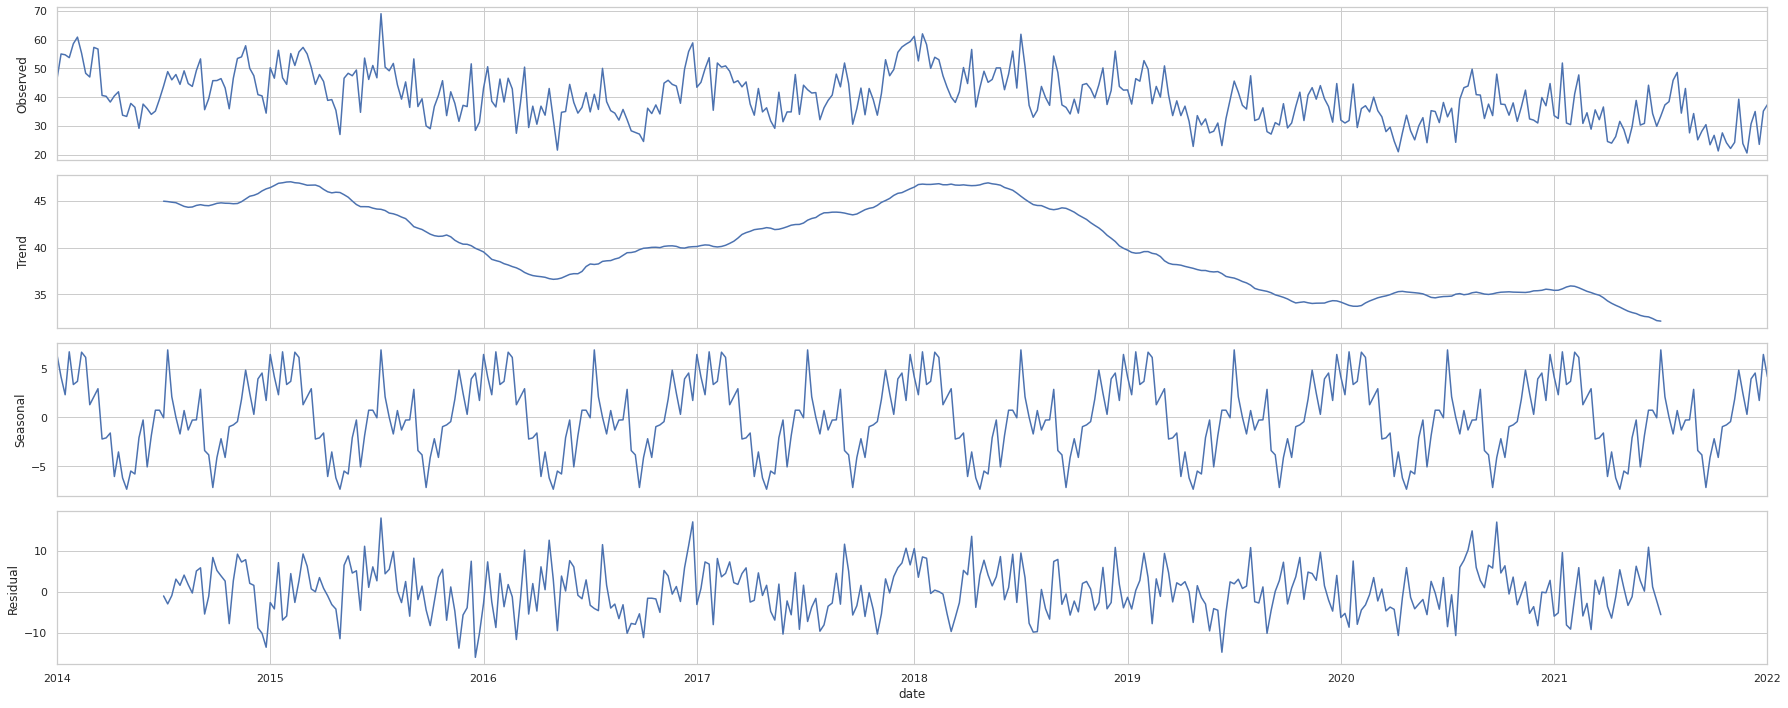

In [42]:
# Decomposition of weekly data

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_weekly.pm25)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual =  decomposition.resid

plt.rcParams.update({'figure.figsize': (25,10)})
decomposition.plot()
plt.show()


### **3.2.3 Monthly Trend**

In [43]:
# I want to see pm2.5 change according to the months.

# Descriptive statistics
table_m = pd.pivot_table(data=df, 
                        index=['month'], 
                        values='pm25',
                        aggfunc=['mean', 'max', 'min', 'std'])

# two level of columns. Drop of them
table_m.columns = table_m.columns.droplevel(1)

# Create a new columns for months
table_m['months'] = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Set index 
table_m = table_m.set_index('months')

table_m.T

months,January,February,March,April,May,June,July,August,September,October,November,December
mean,45.21,45.98,40.88,35.01,35.80,38.23,43.21,39.64,36.02,36.01,41.08,42.32
max,84.00,82.00,96.00,74.00,75.00,77.00,104.00,74.00,70.00,75.00,82.00,80.00
min,15.00,17.00,15.00,13.00,14.00,12.00,16.00,8.00,9.00,12.00,9.00,13.00
std,13.76,13.14,12.11,10.44,12.03,11.47,14.42,11.65,11.84,10.82,13.44,13.77


[Text(0, 0.5, 'PM 2.5'), Text(0.5, 0, 'Months')]

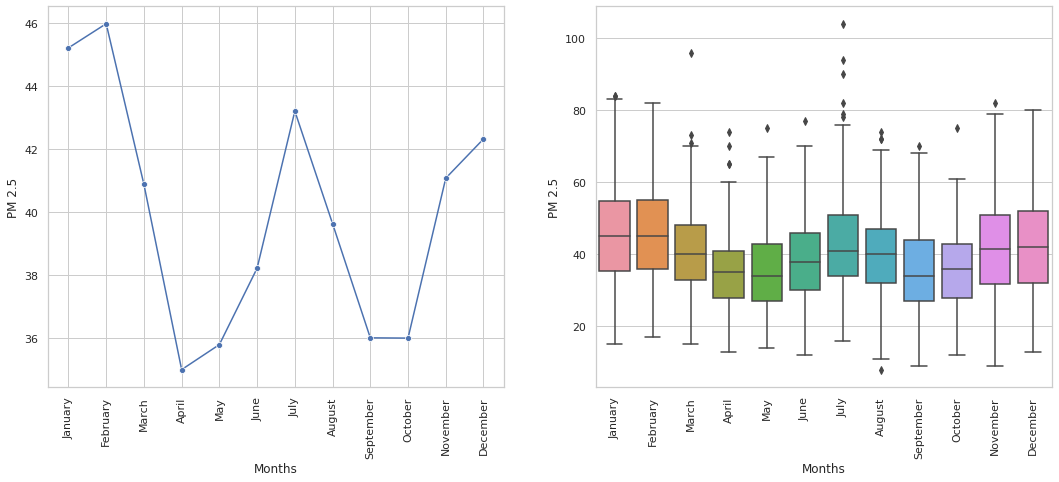

In [44]:
# line and box plot for pm2.5 according to months
f, ax = plt.subplots(1, 2, figsize=(18, 7))
sns.lineplot(x = table_m.index , y= 'mean' , data=table_m, ax=ax[0], marker='o')
sns.boxplot(x='month', y='pm25', data=df, ax=ax[1])
ax[0].set_xticklabels(table_m.index, rotation=90)
ax[1].set_xticklabels(table_m.index, rotation=90) 
ax[0].set(xlabel='Months', ylabel='PM 2.5')
ax[1].set(xlabel='Months', ylabel='PM 2.5')

The statistics of the months without considering the years seperately:
*   The average of PM$_{2.5}$ in January ($\overline{x}=45.21$) and February ($\overline{x}=45.98$) is higher than other months. As expected, in the last two months of the year there is an increase in the PM$_{2.5}$ level. In November ($\overline{x}=41.08$) and February ($\overline{x}=42.32$), the average is not as high as in the first two months. 
*   There is an increase in July ($\overline{x}=43.21$). It could be related to the hot temperature. Contrary to this,  Although the air temperature is low in winter, there is no decrease in PM$_{2.5}$ level. There must be another reason for the high level  PM$_{2.5}$ in the winter.
* July has more outliers and more variance.
*   The variation is low in April and October. 
*   Remarkable decrease in average after February (*11.7%*), March (*15.5%*), and June (*8.6%*).








In [45]:
# PM2.5 values doesn't distributed normally
# Non-parametric Kruskal-Wallis H test
data = [df.loc[ids, 'pm25'].values for ids in df.groupby('month').groups.values()]

H, p = ss.kruskal(*data)
p

# We may reject the null hypothesis that the population medians of all of the groups are equal. 

1.511679162926303e-40

In [46]:
import scipy.stats as ss
import statsmodels.api as sa
import scikit_posthocs as sp

sp.posthoc_conover(df, val_col='pm25', group_col='month', p_adjust = 'holm')

# There is statistical significant difference between months.

,1,2,3,4,5,6,7,8,9,10,11,12
1,1.00,1.00,0.01,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.05,0.35
2,1.00,1.00,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.00,0.01,0.06
3,0.01,0.00,1.00,0.00,0.00,0.71,1.00,1.00,0.00,0.00,1.00,1.00
4,0.00,0.00,0.00,1.00,1.00,0.04,0.00,0.00,1.00,1.00,0.00,0.00
5,0.00,0.00,0.00,1.00,1.00,0.20,0.00,0.00,1.00,1.00,0.00,0.00
6,0.00,0.00,0.71,0.04,0.20,1.00,0.01,1.00,0.38,1.00,0.25,0.03
7,0.72,0.17,1.00,0.00,0.00,0.01,1.00,0.48,0.00,0.00,1.00,1.00
8,0.00,0.00,1.00,0.00,0.00,1.00,0.48,1.00,0.01,0.03,1.00,0.96
9,0.00,0.00,0.00,1.00,1.00,0.38,0.00,0.01,1.00,1.00,0.00,0.00
10,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.03,1.00,1.00,0.00,0.00


There is a statistically significant difference between

*   Jan -- Mar, Apr, May, June, Aug, Sep, Oct, Nov
*   Feb -- Mar, Apr, May, June, Aug, Sep, Oct, Now
*   Mar -- Jan, Feb, Apr, May, Sep, Oct
*   Apr -- Jan, Feb, Mar, Jun, Jul, Aug, Now, Dec
*   May -- Jan, Feb, Mar, Jul, Aug, Now, Dec
*   Jul -- Jan, Feb, Apr, June, Dec
*   Jun -- Apr, May, Jul, Sep, Oct
*   Aug -- Jan, Feb, Apr, May, Sep, Oct
*   Sep -- Jan, Feb, Mar, Jun, Aug, Nov, Dec
*   Oct -- Jan, Feb, Mar, Jun, Aug, Nov, Dec
*   Nov -- Jan, Feb, Apr, May, Sep, Oct
*   Dec -- Apr, May, Jul, Sep, Oct



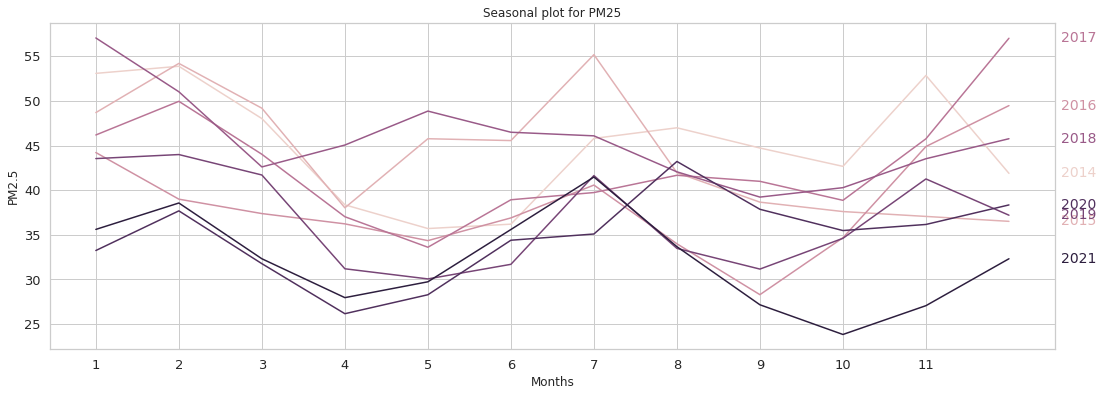

In [47]:
# Seasonal plot
plt.figure(figsize=(18,6))
plt.xticks(np.arange(1, 12, 1.0), fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Months')
plt.ylabel('PM2.5')
ax= sns.lineplot(data=df, 
             x='month', 
             y='pm25', 
             hue='year', 
             legend=None,
             ci= None,
             markers=True)
# add title
plt.title('Seasonal plot for PM25')

# add years at the end of line
for line, name in zip(ax.lines, [2014,2015,2016,2017,2018,2019,2020,2021]):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

plt.show()

* When we examine the monthly mean PM2.5 for every year, we can see that the data from each season are almost overlapped.
* Some years show different behavior in some seasons. For instance, the average of November is higher than December in 2014 and 2019, but it is vice versa in other years. The average PM2.5 in February is lower than in January in 2016 and 2018.  

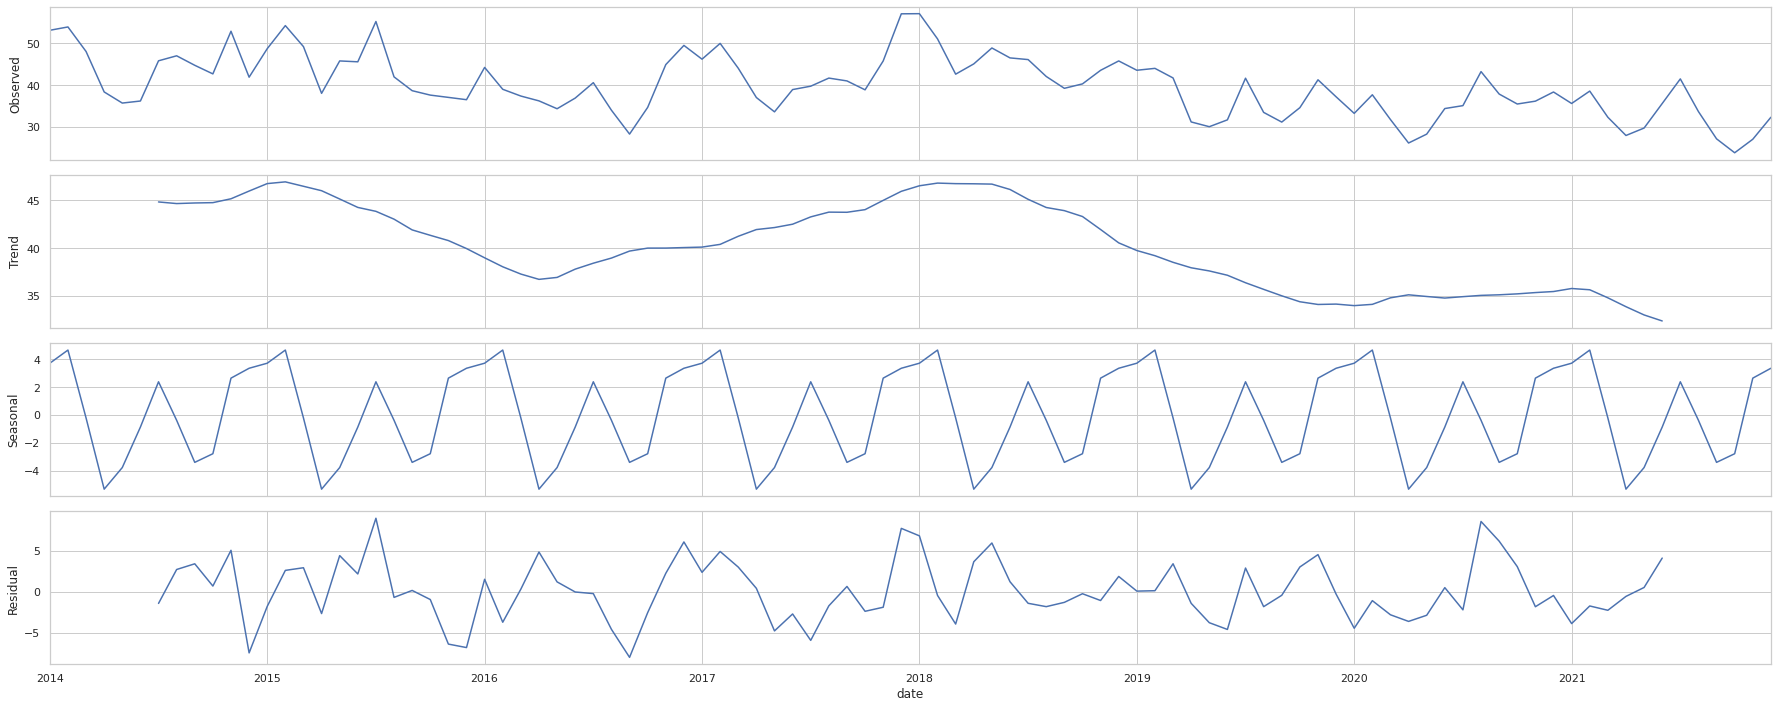

In [48]:
# Monthly decomposition

# Resample dataframe monthly
df_monthly = df.resample(rule='M').mean()


decomposition = seasonal_decompose(df_monthly.pm25)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual =  decomposition.resid

plt.rcParams.update({'figure.figsize': (25,10)})
decomposition.plot()
plt.show()

* There is a clear seasonal trend for monthly data.

### **3.2.4 Quarterly Trend**

In [49]:
# Create a new dataframe for quarterly data
df_quarterly = df.resample(rule='QS').mean()

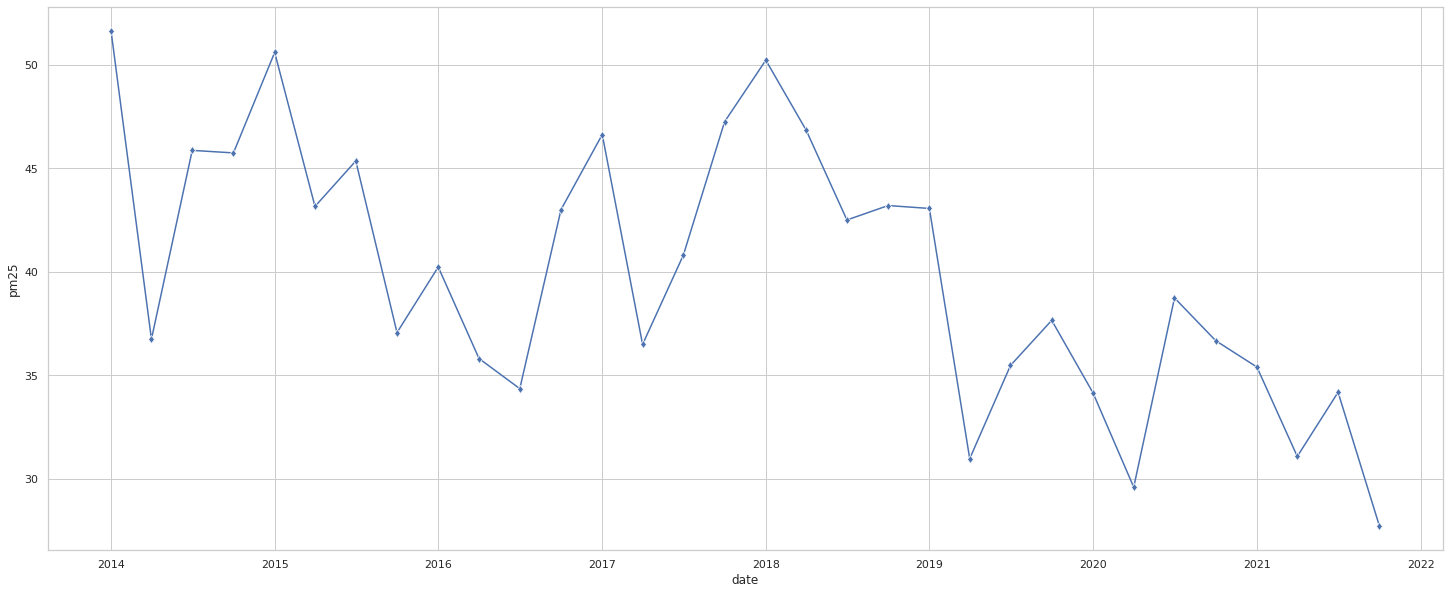

In [50]:
sns.lineplot(x = df_quarterly.index , y='pm25' , data=df_quarterly , marker='d')

As seen in the plot,
* The mean PM$_{2.5}$ value in the first quarter of 2012 ($\overline{x}=27.75$) is almost two times the last quarter of 2021 ($\overline{x}=51.60$).
* There is a downward trend from the first quarter to the second quarter of all years.
* Except 2016 and 2018, there is increase from second quarter to third quarter. 
* Except for 2020 and 2021, there is a rising tendency in the last quarter.       
* *Trend for a year*: There is a decrease in spring, an increase in summer, a decrease again in autumn, and an increase in winter.
* There is a dramatical decrease from the first quarter to the second quarter both in 2014 ($\overline{x}=33.6%$) and in 2014 ($\overline{x}=32.6%$). 

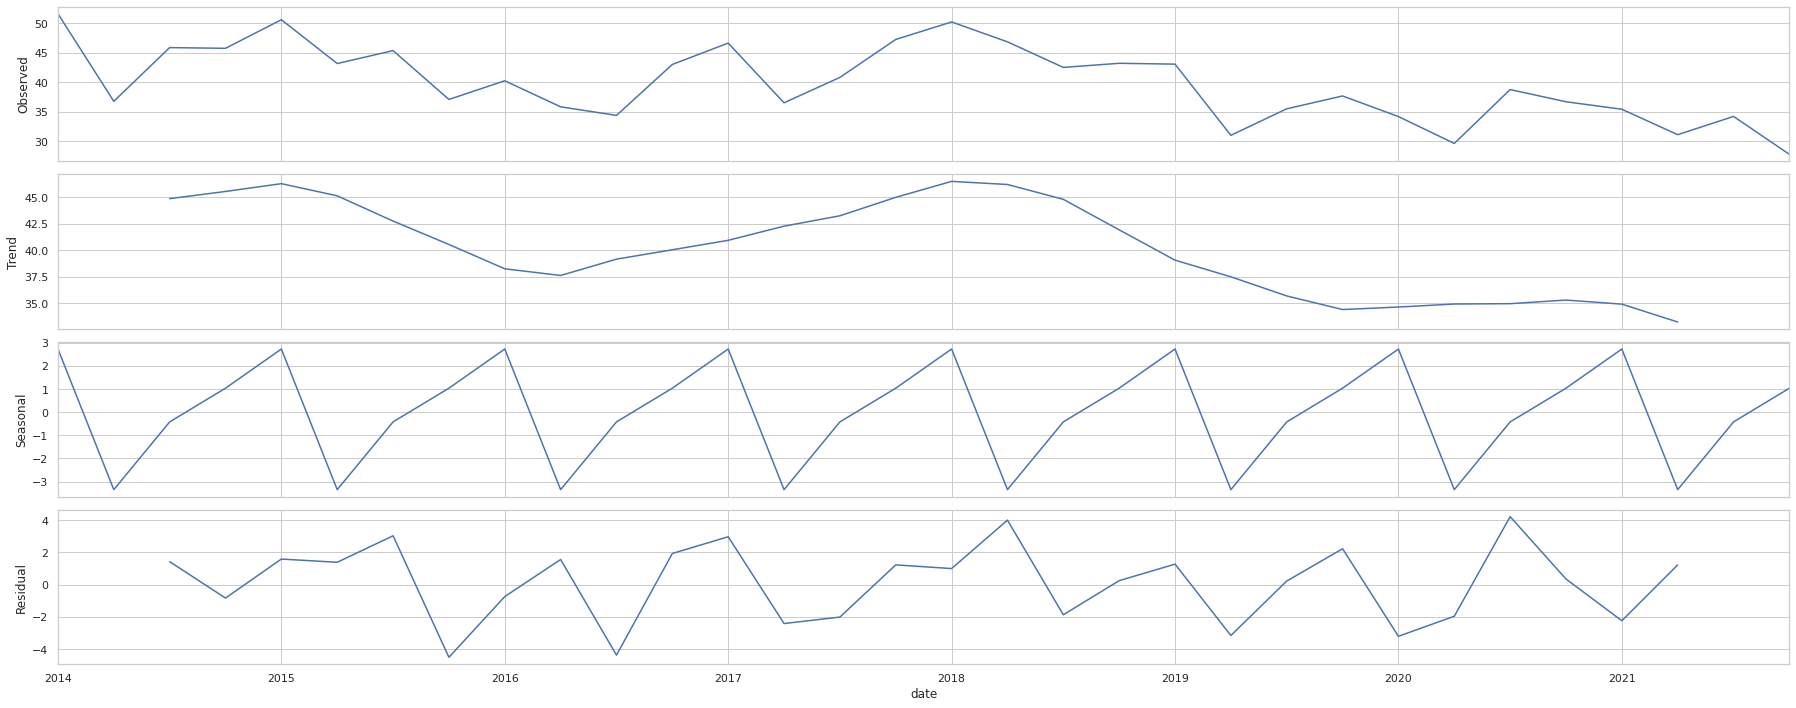

In [51]:
# Quarterly decomposition

decomposition = seasonal_decompose(df_quarterly.pm25)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual =  decomposition.resid

plt.rcParams.update({'figure.figsize': (25,10)})
decomposition.plot()
plt.show()

### **3.2.5 Annual Trend**

In [52]:
# Create a new dataframe for annual data
df_annual = df.resample(rule='A').mean()

In [53]:
table_y = pd.pivot_table(data=df, 
                        index=['year'], 
                        values='pm25',
                        aggfunc=['mean', 'max', 'min', 'std'])

# two level of columns. Drop of them
table_y.columns = table_y.columns.droplevel(1)

table_y.T

year,2014,2015,2016,2017,2018,2019,2020,2021
mean,44.97,44.00,38.35,42.79,45.66,36.77,34.81,32.09
max,96.00,90.00,80.00,76.00,84.00,75.00,82.00,104.00
min,15.00,13.00,13.00,9.00,8.00,12.00,13.00,9.00
std,12.37,13.01,11.49,12.05,12.14,10.98,11.04,13.19


[Text(0, 0.5, 'PM 2.5'), Text(0.5, 0, 'Years')]

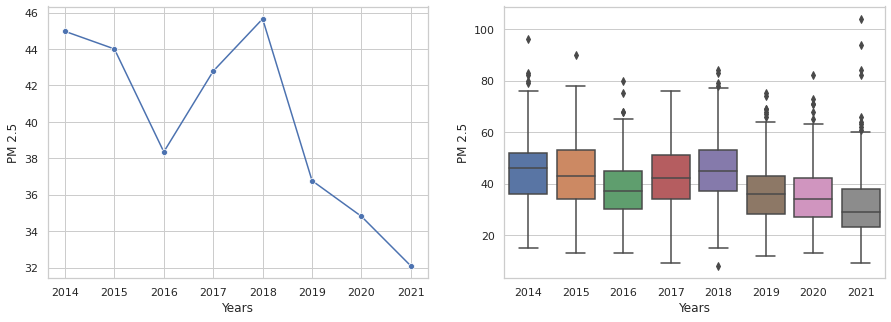

In [54]:
# Line and box plot for annual PM2.5 values
f, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(x = table_y.index , y='mean' , data=table_y , ax=axes[0], marker='o')
sns.boxplot(x='year', y='pm25', data=df, ax=axes[1])

axes[0].set(xlabel='Years', ylabel='PM 2.5')
axes[1].set(xlabel='Years', ylabel='PM 2.5')

* The average PM2.5 is higher in 2014 ($\overline{x}=44.9$), 2015 ($\overline{x}=44$), 2017 ($\overline{x}=42.8$) and 2018 ($\overline{x}=45.6$). The average is close to each other in these years.
* There is a downward trend after 2014 ($\overline{x}=13.7%$) and 2018 ($\overline{x}=21.6%$).
* There is a 17.4% increase from 2016 to 2019.
* There is a 33.4% difference between 2014 and 2021.
* 2020 and 2021 have the lowest values, it could be related with Covid-19. There should be another reason for decrease in 2016. 
* There are a lot of outliers in 2021. Although the range of 2021 is small, the number of outliers seems to be high.

In [55]:
# PM2.5 values doesn't distributed normally
# Non-parametric Kruskal-Wallis H test
data = [df.loc[ids, 'pm25'].values for ids in df.groupby('year').groups.values()]

H, p = ss.kruskal(*data)
p

# We may reject the null hypothesis that the population medians of all of the groups are equal. 

4.696021764105599e-90

In [56]:
# post hoc tests
import scipy.stats as ss
import statsmodels.api as sa
import scikit_posthocs as sp

sp.posthoc_conover(df, val_col='pm25', group_col='year', p_adjust = 'holm')

# There is statistical significant difference between months.

,2014,2015,2016,2017,2018,2019,2020,2021
2014,1.00,0.34,0.00,0.13,0.89,0.00,0.00,0.00
2015,0.34,1.00,0.00,0.89,0.13,0.00,0.00,0.00
2016,0.00,0.00,1.00,0.00,0.00,0.23,0.00,0.00
2017,0.13,0.89,0.00,1.00,0.02,0.00,0.00,0.00
2018,0.89,0.13,0.00,0.02,1.00,0.00,0.00,0.00
2019,0.00,0.00,0.23,0.00,0.00,1.00,0.13,0.00
2020,0.00,0.00,0.00,0.00,0.00,0.13,1.00,0.01
2021,0.00,0.00,0.00,0.00,0.00,0.00,0.01,1.00


There is a significant difference between 

*   2014 -- 2016, 2019, 2020, 2021
*   2015 -- 2016, 2019, 2020, 2021
*   2016 -- 2014, 2015, 2017, 2018, 2020, 2021
*   2017 -- 2016, 2018, 2019, 2020, 2021
*   2018 -- 2016, 2017, 2019, 2020, 2021
*   2019 -- 2014, 2015, 2017, 2018, 2021
*   2020 -- All years except 2019
*   2021 -- All years




## **3.3 Correlation Between PM$_{2.5}$ and Other Features**

In [57]:
# correlation for each separate year
list = []
for year in range(2014, 2022):
  list.append(df[df['year']==year].corr().iloc[0])

df_corrs = pd.DataFrame(list).T
df_corrs.columns = [2014,2015,2016,2017,2018,2019, 2020,2021]
df_corrs

,2014,2015,2016,2017,2018,2019,2020,2021
pm25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
day,-0.11,-0.11,0.06,-0.05,-0.09,-0.04,-0.01,0.03
month,-0.09,-0.34,0.06,0.10,-0.26,-0.13,0.19,-0.17
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempmax,-0.15,-0.01,-0.17,-0.25,-0.06,-0.14,0.21,0.09
tempmin,-0.19,-0.05,-0.20,-0.30,-0.13,-0.18,0.21,0.09
temp,-0.18,-0.03,-0.19,-0.28,-0.09,-0.17,0.21,0.08
feelslikemax,-0.15,-0.04,-0.18,-0.27,-0.06,-0.14,0.21,0.07
feelslikemin,-0.20,-0.06,-0.20,-0.29,-0.12,-0.19,0.23,0.08
feelslike,-0.18,-0.05,-0.19,-0.29,-0.09,-0.17,0.22,0.07


In [58]:
# Correlation for each quarter (include all years)
list_1 =[]

list_1.append(df[(df.month == 1)|(df.month == 2)|(df.month == 3)].corr().iloc[0])
list_1.append(df[(df.month == 4)|(df.month == 5)|(df.month == 6)].corr().iloc[0])
list_1.append(df[(df.month == 7)|(df.month == 8)|(df.month == 9)].corr().iloc[0])
list_1.append(df[(df.month == 10)|(df.month == 11)|(df.month == 12)].corr().iloc[0])

df_corr_q = pd.DataFrame(list_1).T
df_corr_q.columns = ['Q1', "Q2", 'Q3', "Q4"]
df_corr_q

,Q1,Q2,Q3,Q4
pm25,1.00,1.00,1.00,1.00
day,-0.17,0.07,-0.06,0.02
month,-0.14,0.11,-0.22,0.20
year,-0.38,-0.27,-0.23,-0.31
tempmax,-0.10,0.26,0.23,-0.10
tempmin,-0.14,0.24,0.23,-0.16
temp,-0.12,0.25,0.24,-0.14
feelslikemax,-0.09,0.24,0.23,-0.11
feelslikemin,-0.11,0.24,0.23,-0.15
feelslike,-0.10,0.24,0.24,-0.14


In [59]:
# I want to try Q1 of 2014
df[((df.month == 1)|(df.month == 2)|(df.month == 3)&(df.year==2014))].corr().iloc[0]

pm25                  1.00
day                  -0.16
month                 0.05
year                 -0.35
tempmax              -0.03
tempmin              -0.08
temp                 -0.06
feelslikemax         -0.02
feelslikemin         -0.07
feelslike            -0.05
dew                   0.04
humidity              0.16
precip                0.07
precipcover           0.09
snow                 -0.04
snowdepth             0.00
windgust              0.02
windspeed            -0.07
winddir              -0.10
sealevelpressure      0.04
cloudcover            0.10
visibility           -0.16
flight_number         0.10
fuel_and_gas_total    0.09
special_fuel          0.04
gasoline              0.09
vehicle-miles        -0.08
natural_gas           0.06
gasoline_sales        0.14
Population           -0.29
Growth                0.26
GrowthRate            0.26
week_days             0.07
Name: pm25, dtype: float64

In [60]:
# The correlation between PM2.5 and other features

# Create a dataframe for correlation by year.
df_cor = pd.DataFrame(df_annual.corr(method ='pearson').iloc[0])
df_cor.reset_index(inplace=True)
df_cor.columns = ['attributes', 'corr_coef_annual']

# Create a dataframe for correlation by semi-year.
df_cor_semi = pd.DataFrame(df.resample(rule='2BQ').mean().corr(method ='pearson').iloc[0])
df_cor_semi.reset_index(inplace=True)
df_cor_semi.columns = ['attributes', 'corr_coef_semi_annual']

# Merge two dataframes
df_cor = df_cor.merge(df_cor_semi, on='attributes')

# Drop meaningless  attributes
df_cor.drop([1, 2 , 3, 30, 31, 32], inplace=True) # attributes: day, month, year, growth, growthRate, week_days

df_cor

,attributes,corr_coef_annual,corr_coef_semi_annual
0,pm25,1.00,1.00
4,tempmax,-0.84,-0.45
5,tempmin,-0.77,-0.47
6,temp,-0.83,-0.46
7,feelslikemax,-0.87,-0.46
8,feelslikemin,-0.83,-0.48
9,feelslike,-0.87,-0.47
10,dew,-0.26,-0.45
11,humidity,0.66,-0.09
12,precip,-0.18,0.09


[Text(0.5, 1.0, 'Heatmap for Semi-Annual Data')]

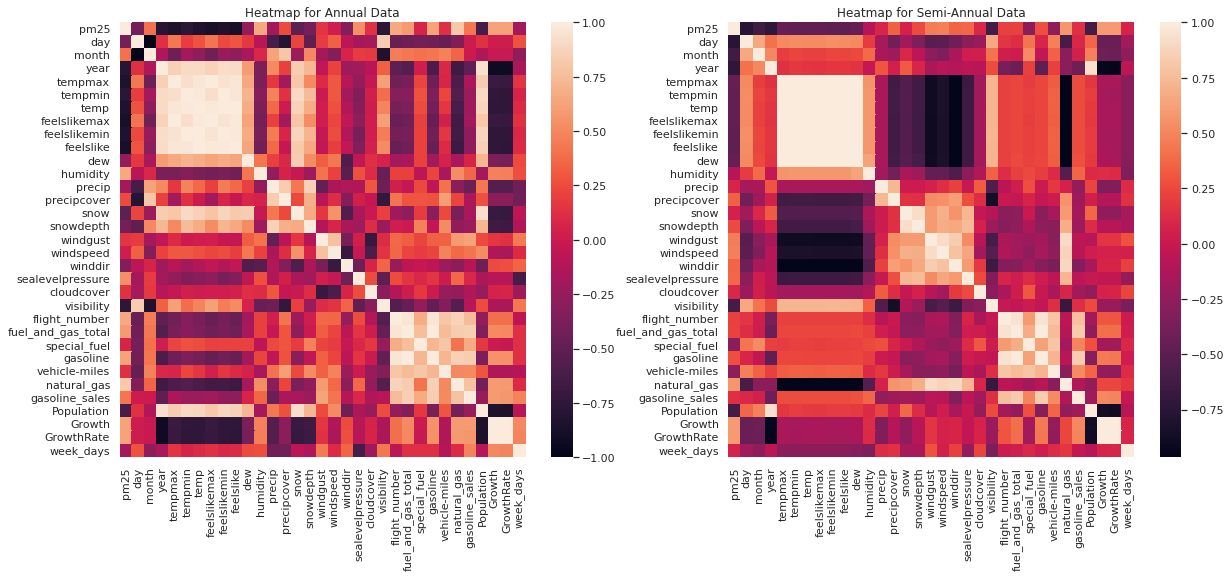

In [61]:
# Plot heatmap both annual and semi-annual data
f, axes = plt.subplots(1, 2, figsize=(20,8))
sns.heatmap(df_annual.corr(method ='pearson'), ax=axes[0]).set(title='Heatmap for Annual Data')
sns.heatmap(df.resample(rule='2BQ').mean().corr(method ='pearson'), ax=axes[1]).set(title='Heatmap for Semi-Annual Data')

According to heatmap and correlation coefficient dataframe,

There is a **positive** relationship (r > .5) between PM$_{2.5}$ and the attributes listed below:
* Humidity
* Sea level pressure
* Gasoline
* Natural gas
* Total fuel and gas
* Number of flights

There is a **negative** relationship (r < - .5) between PM$_{2.5}$ and the attributes listed below:
* Tempeture
* Visibility
* Population
* Snow



In [62]:
# define a function to create scatterplots of PM2.5 against other attributes
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'pm25', data=df_annual, alpha=0.5)
        ax.set(xlabel=col, ylabel='pm2.5')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [63]:
features = [shi_data for shi_data in df_annual.columns]

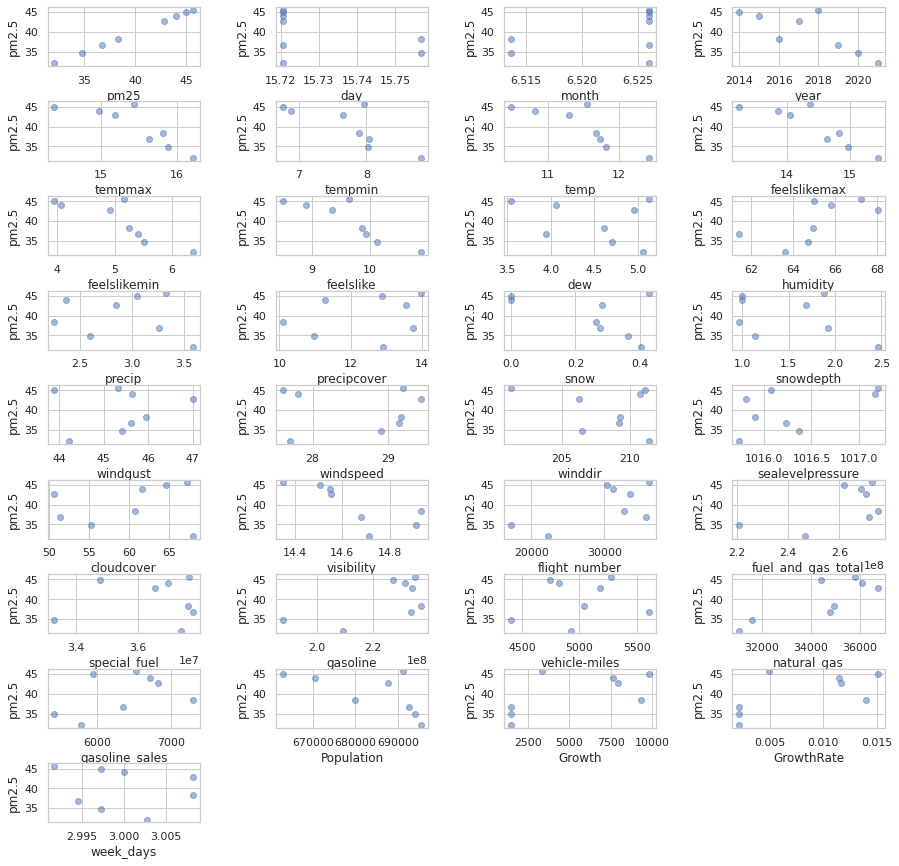

In [64]:
# scatter plot for PM2.5 and every attributes
scatterplots(features, ncol=4, figsize=(15, 15))

## **3.4 Time Plots for PM$_{2.5}$ and Highly Correlated Attributes**

### **3.4.1 PM$_{2.5}$ and Temperature**

In [65]:
import plotly.express as px

fig =  px.line(df_quarterly, x=df_quarterly.index, y=['pm25', 'temp'], title='PM2.5 with slider', markers='o')
fig.update_xaxes(
    rangeslider_visible=True)
fig.show()


*  In all of the years, PM$_{2.5}$ decrease and temperture increase from first quarter to second quarter. 
* Except 2016 and 2018, both attributes increas from second quarter to third quarter.
* For all year, tempeture decrease in the third quarter but it is not same as PM$_{2.5}$.
* From 2014 to 2018, where tempeture decreases, PM$_{2.5}$ increases. 



### **3.4.2 PM$_{2.5}$ and Natural Gas**

Before plotting the changes in PM$_{2.5}$ and natural gas, I want to scale dataframe because there is scale difference between two attributes. Plotting without scaling, pm values seem to be constant because pm values are very small compared to natural gas values. 

**PS**: Scaling does not affect the correlation coefficient.

In [66]:
# drop icon column because it is a object type
df.drop(columns = 'icon', inplace=True)

In [67]:
# get column names and index of df because scaling creates an array.
df_scaled_columns = df.columns
df_scaled_index = df.index

In [68]:
# scale the df
df_scaled = scale(df)
#create a df from scaled array
df_scaled=pd.DataFrame(df_scaled, columns=df_scaled_columns, index=df_scaled_index)
df_scaled.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.



,pm25,day,month,year,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,fuel_and_gas_total,special_fuel,gasoline,vehicle-miles,natural_gas,gasoline_sales,Population,Growth,GrowthRate,week_days
date,,,,,,,,,,,,,,,,,,,,,
2021-12-31,0.93,1.74,1.59,1.53,-0.81,-0.35,-0.58,-0.66,-0.18,-0.40,...,-0.59,0.30,-0.67,0.46,0.71,-0.75,0.99,-1.10,-1.10,0.50
2021-12-30,0.16,1.62,1.59,1.53,-0.95,-0.47,-0.72,-0.73,-0.35,-0.55,...,-0.59,0.30,-0.67,0.46,0.71,-0.75,0.99,-1.10,-1.10,0.00
2021-12-29,0.01,1.51,1.59,1.53,-0.95,-0.52,-0.74,-0.73,-0.43,-0.55,...,-0.59,0.30,-0.67,0.46,0.71,-0.75,0.99,-1.10,-1.10,-0.50
2021-12-28,-1.00,1.39,1.59,1.53,-0.81,-0.75,-0.79,-0.86,-0.56,-0.68,...,-0.59,0.30,-0.67,0.46,0.71,-0.75,0.99,-1.10,-1.10,-1.00
2021-12-27,-1.08,1.28,1.59,1.53,-1.35,-0.94,-1.14,-1.07,-0.97,-1.10,...,-0.59,0.30,-0.67,0.46,0.71,-0.75,0.99,-1.10,-1.10,-1.50


In [69]:
# create quarterly data from scaled dataframe
df_scaled_quarterly = df_scaled.resample(rule='QS').mean()

# plot
fig =  px.line(df_scaled_quarterly, x=df_scaled_quarterly.index, y=['pm25', 'natural_gas'], title='PM2.5 and Natural Gas with slider', markers='o')
fig.update_xaxes(
    rangeslider_visible=True)
fig.show()

* The same pattern exists for both in the first quarter.



### **3.4.3 PM$_{2.5}$ and Humidity**

In [70]:
import plotly.express as px

fig =  px.line(df_scaled_quarterly, x=df_scaled_quarterly.index, y=['pm25', 'humidity'], 
               title='PM2.5 and Humidity with slider',
               markers='o')
fig.update_xaxes(
    rangeslider_visible=True)
fig.show()

### **3.4.4 PM$_{2.5}$ and Flight Number**

In [71]:
import plotly.express as px

fig =  px.line(df_scaled_quarterly, x=df_scaled_quarterly.index, y=['pm25', 'flight_number'], 
               title='PM2.5 and Flight Number with slider',
               markers="o")
fig.update_xaxes(
    rangeslider_visible=True)
fig.show()

### **3.4.5 PM$_{2.5}$ and Flight Number**

In [72]:
import plotly.express as px

fig =  px.line(df_scaled_quarterly, x=df_scaled_quarterly.index, y=['pm25', 'flight_number'], 
               title='PM2.5 and Flight Number with slider',
               markers="o")
fig.update_xaxes(
    rangeslider_visible=True)
fig.show()

### **3.4.6 PM$_{2.5}$ and Population**

In [73]:
import plotly.express as px

fig =  px.line(df_scaled_quarterly, x=df_scaled_quarterly.index, y=['pm25', 'Population'], 
               title='PM2.5 and Population with slider',
               markers="o")
fig.update_xaxes(
    rangeslider_visible=True)
fig.show()

## **3.5 Checking Stationary**

**Stationary** means that the joint distribution of the observations doesn't depend on time. If a data set is not stationary, then it becomes difficult to model. Modeling involves estimating a set of parameters, and if a process is not stationary, and the parameters are different at each point in time, then there are too many parameters to estimate. There two ways of checking stationary. The *Rolling Statistic Test* gives the pictorial representation while the *Dickey-Fuller Test* gives some values which help to determine whether data is stationary or not.


### **3.5.1 Stationary for Daily Data**

In [74]:
# Determining rolling statistics
rollmean = df.pm25.rolling(window=365).mean()
rollstd = df.pm25.rolling(window=365).std()

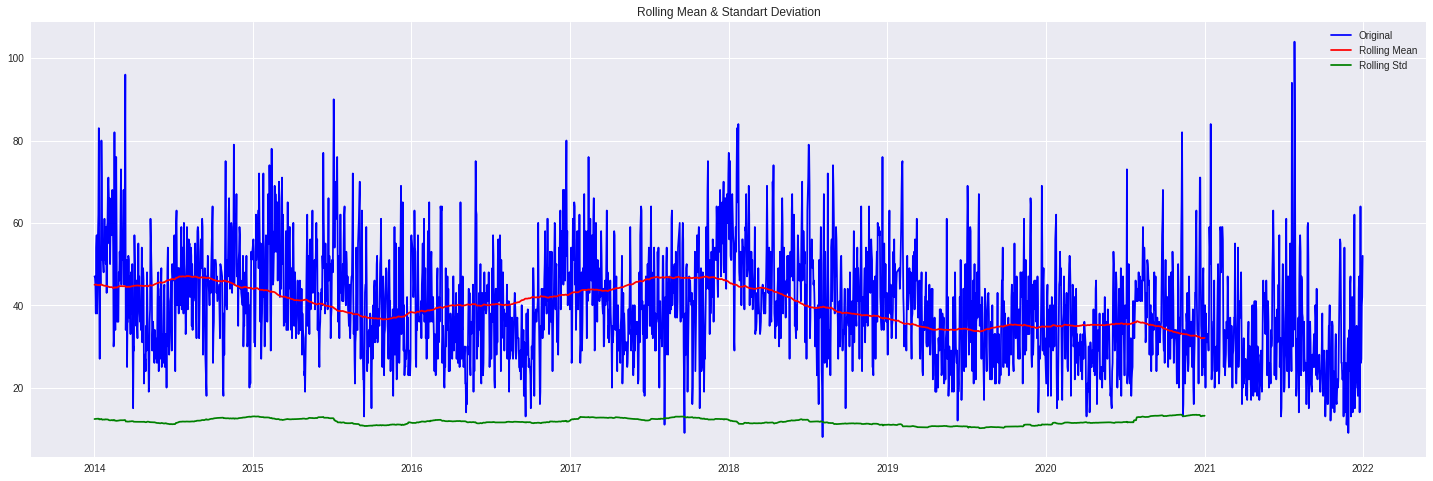

In [75]:
# Plot rolling statistics
plt.style.use('seaborn')
plt.figure(figsize=(25,8))
orig = plt.plot(df.pm25, color = 'blue', label='Original')
mean = plt.plot(rollmean, color = 'red', label='Rolling Mean')
mean = plt.plot(rollstd, color = 'green', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standart Deviation')
plt.show(block=False)

In [76]:
# Perform Dickey - Fuller test for DAILY DATA
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')

dftest = adfuller(df.pm25, autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags Used', "Number of Observation Used"])

for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
           
print(dfoutput)

Results of Dickey-Fuller Test
Test Statistics                -4.93
p-value                         0.00
#Lags Used                     22.00
Number of Observation Used   2899.00
Critical Value (1%)            -3.43
Critical Value (5%)            -2.86
Critical Value (10%)           -2.57
dtype: float64


**H$_0$**: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

**H$_A$**: The time series is stationary.

The p-value from the test is less than .05, then we can reject the null hypothesis and conclude that the time series is stationary. Also, the test statistic is lower than any of the critical values. Therefore, we do not need to difference the time series.

### **3.5.2 Stationary for Monthly Data**

In [77]:
# Determining rolling statistics
rollmean = df_monthly.pm25.rolling(window=12).mean()
rollstd = df_monthly.pm25.rolling(window=12).std()

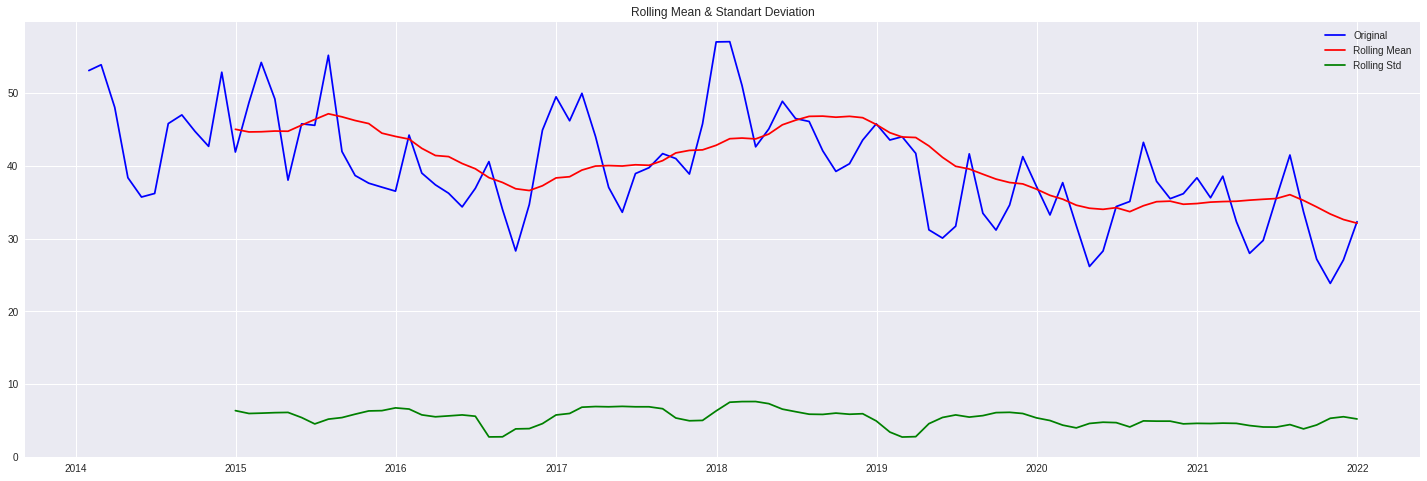

In [78]:
# Plot rolling statistics
plt.style.use('seaborn')
plt.figure(figsize=(25,8))
orig = plt.plot(df_monthly.pm25, color = 'blue', label='Original')
mean = plt.plot(rollmean, color = 'red', label='Rolling Mean')
mean = plt.plot(rollstd, color = 'green', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standart Deviation')
plt.show(block=False)

The mean and standard deviation are not constant, so the data is non-stationary. The other way is the Augmented Dickey-Fuller (ADF) test.

In [79]:
# Perform Dickey - Fuller test for MONTHLY data
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')

dftest = adfuller(df_monthly.pm25, autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags Used', "Number of Observation Used"])

for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
           
print(dfoutput)

Results of Dickey-Fuller Test
Test Statistics              -1.80
p-value                       0.38
#Lags Used                    6.00
Number of Observation Used   89.00
Critical Value (1%)          -3.51
Critical Value (5%)          -2.89
Critical Value (10%)         -2.58
dtype: float64


p value is bigger than .05 we can not reject the null hypothesis.

In [80]:
# Get the difference
df_monthly['pm25_diff_1'] = df_monthly.pm25.diff(1)
# We don't want NaNs
df_monthly['pm25_diff_1'].iloc[1:].head()

date
2014-02-28    0.80
2014-03-31   -5.86
2014-04-30   -9.67
2014-05-31   -2.66
2014-06-30    0.49
Freq: M, Name: pm25_diff_1, dtype: float64

In [81]:
# Perform Dickey - Fuller test for DIFF(1) - MONTHLY data 
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')

dftest = adfuller(df_monthly['pm25_diff_1'].iloc[1:], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags Used', "Number of Observation Used"])

for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
           
print(dfoutput)

# We can not reject the Null Hypothesis

Results of Dickey-Fuller Test
Test Statistics              -2.43
p-value                       0.13
#Lags Used                   12.00
Number of Observation Used   82.00
Critical Value (1%)          -3.51
Critical Value (5%)          -2.90
Critical Value (10%)         -2.59
dtype: float64


In [83]:
# Get the difference 2
df_monthly['pm25_diff_2'] = df_monthly.pm25.diff(2)
# We don't want NaNs
df_monthly['pm25_diff_2'].iloc[2:].head()

date
2014-03-31    -5.06
2014-04-30   -15.53
2014-05-31   -12.32
2014-06-30    -2.17
2014-07-31    10.10
Freq: M, Name: pm25_diff_2, dtype: float64

In [84]:
# Perform Dickey - Fuller test for MONTHLY data
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')

dftest = adfuller(df_monthly['pm25_diff_2'].iloc[2:], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags Used', "Number of Observation Used"])

for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
           
print(dfoutput)

# This is stationary

Results of Dickey-Fuller Test
Test Statistics              -5.08
p-value                       0.00
#Lags Used                    7.00
Number of Observation Used   86.00
Critical Value (1%)          -3.51
Critical Value (5%)          -2.90
Critical Value (10%)         -2.59
dtype: float64


In [85]:
# WAY 2; Get the log of values.
df_log = np.log(df_monthly[['pm25']])
moving_ave = df_log.rolling(window=12).mean()

df_m_adf = df_log - moving_ave
df_m_adf.dropna(inplace = True)

In [86]:
# Perform Dickey - Fuller test for MONTHLY data
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')

dftest = adfuller(df_m_adf['pm25'], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lags Used', "Number of Observation Used"])

for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
           
print(dfoutput)

Results of Dickey-Fuller Test
Test Statistics              -6.05
p-value                       0.00
#Lags Used                    1.00
Number of Observation Used   83.00
Critical Value (1%)          -3.51
Critical Value (5%)          -2.90
Critical Value (10%)         -2.59
dtype: float64


## **3.5 Lag Plots**

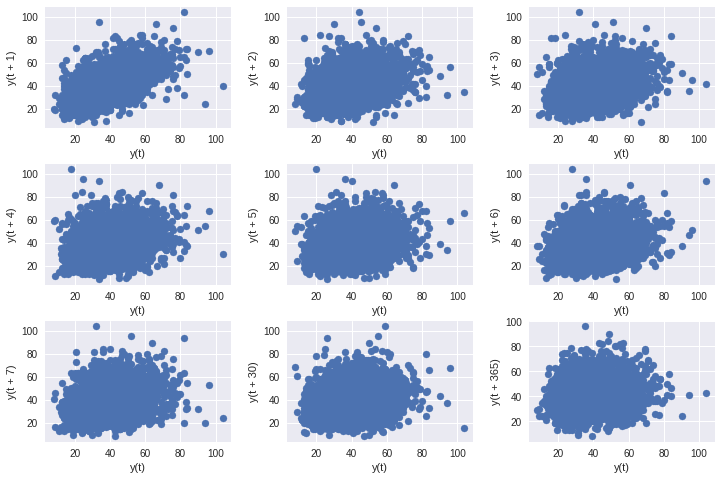

In [87]:
# lag plot for daily data
fig , ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7,ax8, ax9)) = plt.subplots(3,3, figsize=(12,8))
fig.subplots_adjust(hspace = .3, wspace= .3)
lag_plot(df.pm25, lag=1, ax = ax1)
lag_plot(df.pm25, lag=2, ax = ax2)
lag_plot(df.pm25, lag=3, ax = ax3)
lag_plot(df.pm25, lag=4, ax = ax4)
lag_plot(df.pm25, lag=5, ax = ax5)
lag_plot(df.pm25, lag=6, ax = ax6)
lag_plot(df.pm25, lag=7, ax = ax7)
lag_plot(df.pm25, lag=30, ax = ax8)
lag_plot(df.pm25, lag=365, ax = ax9)


## **3.6 Autocorrelation and Partial Autocorrelation**

**Autocorrelation** is the correlation of a single time series with a lagged copy of itself.
These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps.

In [88]:
from statsmodels.tsa.stattools import acf

acf(df.pm25)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



array([1.        , 0.59812177, 0.36110628, 0.29511395, 0.28180908,
       0.26319241, 0.27053563, 0.2831589 , 0.29457218, 0.28671419,
       0.26672493, 0.26297044, 0.25085751, 0.24250367, 0.2461989 ,
       0.27077142, 0.28253196, 0.26549192, 0.24737803, 0.26083051,
       0.2597547 , 0.25602154, 0.24448321, 0.26204407, 0.2596381 ,
       0.24383751, 0.22457085, 0.22083624, 0.22323474, 0.22856299,
       0.21902714, 0.21735146, 0.22252744, 0.21249899, 0.18327535,
       0.18143715, 0.18996309, 0.18947614, 0.19107029, 0.18488565,
       0.18762149])

<Figure size 360x216 with 0 Axes>

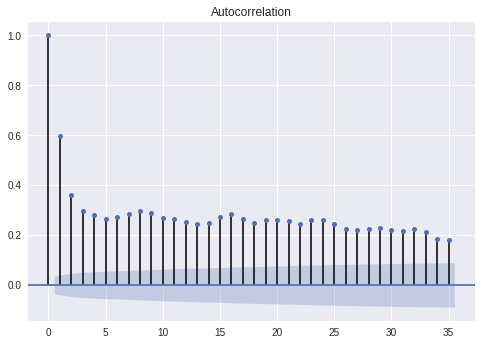

In [89]:
# Lag plots for daily data
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(5,3))
plot_acf(df.pm25)
plt.show()

* There is a correlation at lag=1.
* The spikes are statistically significant for lags up to 35. This means that the PM2.5 values are highly correlated with each other. In other words, when they rises/falls, it tends to continue rising/falling.

<Figure size 360x216 with 0 Axes>

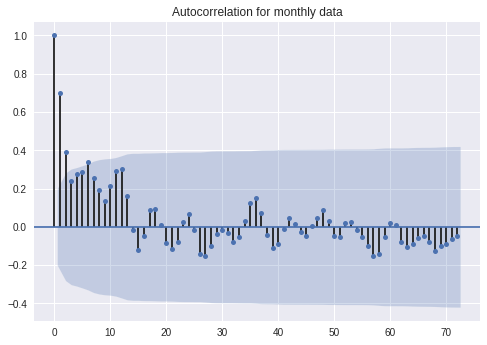

In [90]:
# Lag plots for monthly data
plt.figure(figsize=(5,3))
plot_acf(df_monthly.pm25, lags=72, title='Autocorrelation for monthly data')
plt.show()

A **partial autocorrelation** is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed. We can see the direct impact a previous observation has on the value to be predicted at a time.

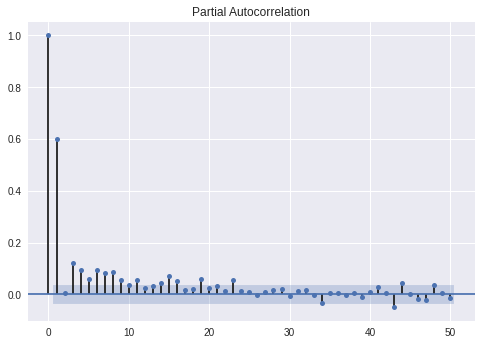

In [91]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.pm25, lags=50)
plt.show()